# Reducing Dimensionality

## Understanding SVD

In exploring various possible transformations, using a for loop may tell you
that a power transformation will increase the correlation between the two
variables, thus increasing the performance of a linear machine‐learning algorithm.
You may also try other, further transformations such as square root
np.sqrt(x), exponential np.exp(x), and various combinations of all the
transformations, such as log inverse np.log(1/x).

### Considering the problem of dimensionality reduction

### Using SVD to measure the invisible

In [1]:
import numpy as np
A = np.array([[1, 3, 4], [2, 3, 5], [1, 2, 3], [5, 4, 6]])
print(A)

[[1 3 4]
 [2 3 5]
 [1 2 3]
 [5 4 6]]


✓✓U: Contains all the information about the rows (your observations)
✓✓Vh: Contains all the information about the columns (your features)
✓✓s: Records the SVD process (it is kind of a log record)

In [2]:
U, s, Vh = np.linalg.svd(A, full_matrices=False)
print np.shape(U), np.shape(s),np.shape(Vh)
print U
print s
print Vh

(4, 3) (3,) (3, 3)
[[-0.40292616 -0.5847182  -0.63627513]
 [-0.49916963 -0.31525396  0.74868921]
 [-0.3006986  -0.29999072  0.03747136]
 [-0.70573404  0.68463504 -0.18224798]]
[ 12.26362747   2.11085464   0.38436189]
[[-0.42651607 -0.49990272 -0.75377802]
 [ 0.90387955 -0.26593862 -0.3350797 ]
 [-0.03295143 -0.82424142  0.56527895]]


The matrix U, representing the rows, has four row values. The matrix Vh is a
square matrix, and its three rows represent the original columns. The matrix
s is a diagonal matrix. A diagonal matrix contains zeros in every element but
its diagonal. The length of its diagonal is exactly that of the three original
columns.
Inside s, you find that most of the values are in the first elements,
indicating that the first column is what holds the most information (more
than 80 percent), the second has some values (about 14 percent), and the
third contains the residual values.

In [3]:
print np.dot(np.dot(U, np.diag(s)), Vh) # Full matrix reconstruction

[[ 1.  3.  4.]
 [ 2.  3.  5.]
 [ 1.  2.  3.]
 [ 5.  4.  6.]]


For example, you might want to see what happens when you exclude the
third column, the less important of the three. The following example shows
what happens when you cut the last column from all three matrices.

In [4]:
print np.round(np.dot(np.dot(U[:,:2], np.diag(s[:2])), Vh[:2,:]),1) # k=2 reconstruction

[[ 1.   2.8  4.1]
 [ 2.   3.2  4.8]
 [ 1.   2.   3. ]
 [ 5.   3.9  6. ]]


The following code removes both the second and third columns. Now there are more errors. Some elements of the matrix are missing more
than a few decimal points. However, you can see that most of the numeric
information is intact. Just imagine the potential of using such a technique on
a larger matrix, a matrix with hundreds of columns.

In [5]:
print np.round(np.dot(np.dot(U[:,:1], np.diag(s[:1])), Vh[:1,:]),1) # k=1 reconstruction

[[ 2.1  2.5  3.7]
 [ 2.6  3.1  4.6]
 [ 1.6  1.8  2.8]
 [ 3.7  4.3  6.5]]


As a general rule, you
should consider solutions maintaining from 70 to 99 percent of the original
information; however, that’s not a strict rule — it really depends on how
important it is for you to be able to reconstruct the original dataset.

In [6]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
X = sparse_random_matrix(100, 100, density=0.01, random_state=42)
svd = TruncatedSVD(n_components=5, random_state=42)
svd.fit(X) 
print(svd.explained_variance_ratio_) 
print(svd.explained_variance_ratio_.sum())
shape(svd.components_)

[ 0.07825467  0.0552851   0.054451    0.04996887  0.04132026]
0.279279901364


NameError: name 'shape' is not defined

## Performing Factor Analysis

### Considering the psychometric model

### Looking for hidden factors

In [7]:
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis
iris = load_iris()
X = iris.data
Y = iris.target
factor = FactorAnalysis(n_components=4).fit(X)

In [8]:
print Y
print X

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4

In [9]:
import pandas as pd
print pd.DataFrame(factor.components_,columns=iris.feature_names)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.707227         -0.153147           1.653151          0.701569
1           0.114676          0.159763          -0.045604         -0.014052
2          -0.000000          0.000000           0.000000          0.000000
3          -0.000000          0.000000           0.000000         -0.000000


the
FactorAnalysis class is initialized with a request to look for four factors.
The data is then fitted. You can explore the results by observing the components_
attribute, which returns an array containing measures of the relationship
between the newly created factors, placed in rows, and the original
features, placed in columns. At the intersection of each factor and feature,
a positive number indicates that a positive proportion exists between the
two; a negative number, instead, points out that they diverge and one is the
contrary
to the other.

In the test on the Iris dataset, for example, the resulting factors should be a
maximum of 2, not 4, because only two factors have significant connections
with the original features. You can use these two factors as new variables in
your project because they reflect an unseen but important feature that the
previously available data only hinted at.

## Executing Principal Component Analysis

### Using components, not factors

If an SVD could be successfully applied to the common variance, you might
wonder why you can’t apply it to all the variances. Using a slightly modified starting
matrix, all the relationships in the data could be reduced and compressed
in a similar way to how SVD does it. The results of this process, which are quite
similar to SVD, are called principal components analysis (PCA). The newly created
features are named components. In contrast to factors, components aren’t
described as the root cause of the data structure but are just restructured data,
so you can view them as a big, smart summation of selected variables.
For data science applications, PCA and SVD are quite similar. However, PCA
isn’t affected by the scale of the original features (because it works on correlation
measures that are all bound between –1 and +1 values) and PCA
focuses on rebuilding the relationship between the variables, thus offering
different results from SVD.

### Achieving dimensionality reduction

The procedure to obtain a PCA is quite similar to the factor analysis. The
difference
is that you don’t specify the number of components to extract. You
decide later how many components to keep after checking the explained_
variance_ratio_ attribute, which provides quantification (in percentage)
of the informative value of each extracted component. The following example
shows how to perform this task:

In [10]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA().fit(X)
print 'Explained variance by each component: %s' % pca.explained_variance_ratio_
print pd.DataFrame(pca.components_,columns=iris.feature_names)

Explained variance by each component: [ 0.92461621  0.05301557  0.01718514  0.00518309]
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.361590         -0.082269           0.856572          0.358844
1          -0.656540         -0.729712           0.175767          0.074706
2           0.580997         -0.596418          -0.072524         -0.549061
3           0.317255         -0.324094          -0.479719          0.751121


In this decomposition of the Iris dataset, the vector array provided by
explained_variance_ratio_ indicates that most of the information is
concentrated into the first component (92.5 percent). You saw this same sort
of result after the factor analysis. It’s therefore possible to reduce the entire
dataset to just two components, providing a reduction of noise and redundant
information from the original dataset.

In [11]:
print pca.components_
print pca.n_components_

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]
 [ 0.58099728 -0.59641809 -0.07252408 -0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]
4


## Understanding some applications

### Recognizing faces with PCA

The dataset contains 400 images of 40 different persons. The photos were taken
with different light conditions and facial expressions (including open/closed eyes,
smiling/not smiling, and with glasses/no glasses). For additional information about
the dataset refer to http://www.cl.cam.ac.uk/research/dtg/attarchive/
facedatabase.html.
Looking at the content of the faces object, we get the following properties: images,
data, and target. Images contain the 400 images represented as 64 x 64 pixel
matrices. data contains the same 400 images but as array of 4096 pixels. target is, as
expected, an array with the target classes, ranging from 0 to 39.

In [12]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces(shuffle=True, random_state=101)
train_faces = dataset.data[:350,:]
test_faces  = dataset.data[350:,:]
train_answers = dataset.target[:350]
test_answers = dataset.target[350:]

print dataset.DESCR

Modified Olivetti faces dataset.

The original database was available from (now defunct)

    http://www.uk.research.att.com/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [21]:
print dataset.data.shape
print dataset.target.shape

from scipy.stats import itemfreq
print itemfreq(dataset.target)

(400, 4096)
(400,)
[[  0.  10.]
 [  1.  10.]
 [  2.  10.]
 [  3.  10.]
 [  4.  10.]
 [  5.  10.]
 [  6.  10.]
 [  7.  10.]
 [  8.  10.]
 [  9.  10.]
 [ 10.  10.]
 [ 11.  10.]
 [ 12.  10.]
 [ 13.  10.]
 [ 14.  10.]
 [ 15.  10.]
 [ 16.  10.]
 [ 17.  10.]
 [ 18.  10.]
 [ 19.  10.]
 [ 20.  10.]
 [ 21.  10.]
 [ 22.  10.]
 [ 23.  10.]
 [ 24.  10.]
 [ 25.  10.]
 [ 26.  10.]
 [ 27.  10.]
 [ 28.  10.]
 [ 29.  10.]
 [ 30.  10.]
 [ 31.  10.]
 [ 32.  10.]
 [ 33.  10.]
 [ 34.  10.]
 [ 35.  10.]
 [ 36.  10.]
 [ 37.  10.]
 [ 38.  10.]
 [ 39.  10.]]


In [14]:
from sklearn.decomposition import RandomizedPCA
n_components = 25
Rpca = RandomizedPCA(n_components=n_components, whiten=True).fit(train_faces)
print 'Explained variance by %i components: %0.3f' % (n_components, np.sum(Rpca.explained_variance_ratio_))
compressed_train_faces = Rpca.transform(train_faces)
compressed_test_faces  = Rpca.transform(test_faces)

Explained variance by 25 components: 0.794


In [19]:
print train_answers[17]
print test_answers[17]

15
34


We are looking for face id=34


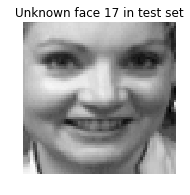

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
photo = 17
print 'We are looking for face id=%i' % test_answers[photo]
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Unknown face '+str(photo)+' in test set')
plt.imshow(test_faces[photo].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')

Figure 14-1 represents the chosen photo from the test set. It is subject
number 34.

After the decomposition of the test set, the example takes the data relative
only to photo 17 and subtracts it from the decomposition of the training
set. Now the training set is made of differences with respect to the example
photo. The code squares them (to remove negative values) and sums them
by row. That results in a series of summed errors. The most similar photos
are the ones with the least‐squared errors, the ones whose differences are
the least.

In [38]:
mask = compressed_test_faces[photo,] #Just the vector of value components of our photo
squared_errors = np.sum((compressed_train_faces - mask)**2,axis=1)
minimum_error_face = np.argmin(squared_errors)  # returns index of minimum value
most_resembling = list(np.where(squared_errors < 20)[0])
print 'Best resembling face in train test: %i' % train_answers[minimum_error_face]
print squared_errors.shape

Best resembling face in train test: 34
(350,)


34
34
34


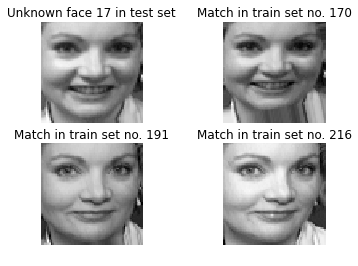

In [40]:
import matplotlib.pyplot as plt
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Unknown face '+str(photo)+' in test set')
plt.imshow(test_faces[photo].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')
for k,m in enumerate(most_resembling[:3]):
    print train_answers[m]
    plt.subplot(2, 2, 2+k)
    plt.title('Match in train set no. '+str(m))
    plt.axis('off')
    plt.imshow(train_faces[m].reshape(64,64), cmap=plt.cm.gray, interpolation='nearest')
plt.show()

Even though the most similar photo is similar (it’s just scaled slightly differently),
the other two photos are quite different. However, even though those
photos don’t match the text image as well, they really do show the same
person as in photo 17.

### Positive Matrix factorization

In [41]:
import os
print os.getcwd()

/Users/sbajaj/Google Drive/Documents/LBNL/Books/844182 Source Code 02 01 2016


This is a perfect application for the SVD family, because by reducing the
number of columns, the features (in a document, the words are the features)
will gather in dimensions, and you can discover the topics by checking highscoring
words. SVD and PCA provide features to relate both positively and
negatively with the newly created dimensions. So a resulting topic may be
expressed by the presence of a word (high positive value) or by the absence
of it (high negative value), making interpretation both tricky and counterintuitive
for humans. Luckily, Scikit‐learn includes the Non‐Negative Matrix
Factorization (NMF) decomposition class, which allows an original feature to
relate only positively with the resulting dimensions.

In [50]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, categories = ['misc.forsale'], remove=('headers', 'footers', 'quotes'), random_state=101)
print 'Posts: %i' % len(dataset.data)
print len(dataset.data)

Posts: 585
585


In [43]:
print dataset.target_names

['misc.forsale']


The TfidVectorizer class is imported and set up to remove stop words
(common words such as the or and) and keep only distinctive words, producing
a matrix whose columns point to distinct words. Term frequency‐inverse document frequency (Tf‐idf) is a simple calculation
based on the frequency of a word in document. It is weighted by the rarity of
the word between all the documents available. Weighting words is an effective
way to rule out words that cannot help you to classify or to identify the
document when processing text. For example, you can eliminate common
parts of speech or other common words.

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(dataset.data)
print tfidf.shape
print tfidf[1]

(585, 3775)
  (0, 1554)	0.183110983537
  (0, 94)	0.179908696221
  (0, 1906)	0.212128648712
  (0, 2151)	0.167089934497
  (0, 2202)	0.186618692418
  (0, 2733)	0.174235475273
  (0, 2347)	0.164986328394
  (0, 1657)	0.23092860881
  (0, 3080)	0.194831064048
  (0, 2709)	0.530888632356
  (0, 2992)	0.199745431567
  (0, 2415)	0.0857473173613
  (0, 2117)	0.204492670588
  (0, 2476)	0.235461186466
  (0, 2348)	0.155965065138
  (0, 1294)	0.164986328394
  (0, 2080)	0.199745431567
  (0, 1614)	0.23092860881
  (0, 3454)	0.205418652515
  (0, 3443)	0.212128648712
  (0, 662)	0.138468005257


As with other algorithms from the sklearn.decomposition module, the
n_components parameter indicates the number of desired components. If
you’d like to look for more topics, you use a higher number. As the required
number of topics increases, the reconstruction_err_ method reports
lower error rates. It’s up to you to decide when to stop given the trade‐off
between more time spent on computations and more topics.

In [58]:
from sklearn.decomposition import NMF
n_topics = 5
nmf = NMF(n_components=n_topics, random_state=101).fit(tfidf)
print nmf.components_.shape
print nmf.reconstruction_err_

(5, 3775)
23.2750402208


You can explore the resulting model by looking into the attribute components_
from the trained NMF model. It consists of a NumPy ndarray holding
positive values for words connected to the topic. By using the argsort
method, you can get the indexes of the top associations, whose high values
indicate that they are the most representative words.

In [56]:
feature_names = vectorizer.get_feature_names()
n_top_words = 15
for topic_idx, topic in enumerate(nmf.components_):
    print "Topic #%d:" % (topic_idx+1),
    print " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

Topic #1: drive hard card floppy monitor meg ram disk motherboard vga scsi brand color internal modem
Topic #2: 00 50 dos 20 10 15 cover 1st new 25 price man 40 shipping comics
Topic #3: condition excellent offer asking best car old sale good new miles 10 000 tape cd
Topic #4: email looking games game mail interested send like thanks price package list sale want know
Topic #5: shipping vcr stereo works obo included amp plus great volume vhs unc mathes gibbs radley


In [57]:
nmf = NMF(n_components=n_topics+100, random_state=101).fit(tfidf)
nmf.reconstruction_err_

19.073339974010512

### Movie Recommendation Engine

the method
is called collaborative filtering).
You can implement collaborative recommendations based on simple means
or frequencies calculated on other customers’ set of purchased items or on
ratings using SVD.

In [82]:
import pandas as pd
from scipy.sparse import csr_matrix
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=['user_id', 'gender', 'age', 'occupation', 'zip'])
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=['movie_id', 'title', 'genres'])
print users.head()
print ratings.head()
print movies.head()
MovieLens = pd.merge(pd.merge(ratings, users), movies)
print MovieLens.head()
print MovieLens.shape
print 'Number of unique users = {}'.format(len(MovieLens['user_id'].unique()))

/Users/sbajaj/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()
/Users/sbajaj/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
/Users/sbajaj/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.


   user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455
   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291
   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
   user_id  movie_id  rating  timestamp 

In [77]:
ratings_mtx_df = MovieLens.pivot_table(values='rating', index='user_id', columns='title', fill_value=0)
print ratings_mtx_df.head()
print ratings_mtx_df.shape
movie_index = ratings_mtx_df.columns
print movie_index

title    $1,000,000 Duck (1971)  'Night Mother (1986)  \
user_id                                                 
1                             0                     0   
2                             0                     0   
3                             0                     0   
4                             0                     0   
5                             0                     0   

title    'Til There Was You (1997)  'burbs, The (1989)  \
user_id                                                  
1                                0                   0   
2                                0                   0   
3                                0                   0   
4                                0                   0   
5                                0                   0   

title    ...And Justice for All (1979)  1-900 (1994)  \
user_id                                                
1                                    0             0   
2                        

In [79]:
from sklearn.decomposition import TruncatedSVD
recom = TruncatedSVD(n_components=10, random_state=101)
print ratings_mtx_df.values.shape
print ratings_mtx_df.values.T.shape
R = recom.fit_transform(ratings_mtx_df.values.T)
print R.shape

(6040, 3706)
(3706, 6040)
(3706, 10)


The TruncatedSVD class reduces the data table to ten components. This
class offers a more scalable algorithm than SciPy’s linalg.svd used in earlier
examples. TruncatedSVD computes result matrices of exactly the shape
you decide by the n_components parameter (the full resulting matrices are
not calculated), resulting in a faster output and less memory usage.
By calculating the Vh matrix, you can reduce the ratings of different but similar
users (each user’s scores are expressed by row) into compressed dimensions
that reconstruct general tastes and preferences. Please also notice that
because you’re interested in the Vh matrix (the columns/movies reduction)
but the algorithm provides you with only the U matrix (the decomposition
based on rows), you need to input the transposition of the data table

Using the movie label (in such cases, you look for suggestions based on preference
for a Star Wars episode), you can find out what column the movie is in
(column index 3154 in this case) and print the values of the 10 components.
This sequence provides the movie profile.

In [80]:
# 1196::Star Wars: Episode V - The Empire Strikes Back (1980)::Action|Adventure|Drama|Sci-Fi|War
star_wars_idx = list(movie_index).index('Star Wars: Episode V - The Empire Strikes Back (1980)')
print star_wars_idx
print R[star_wars_idx]

3154
[ 184.72254552  -17.7761415    47.33483561  -51.46669814  -47.9152707
  -17.6500095   -14.34294202  -12.88678015  -17.48586355   -5.3837019 ]


You could try to interpret it, but
the focus is on other movies that are similar based on the users’ ratings.
These movies have similar scores to the target movie and therefore are highly correlated with it. A good strategy is to calculate a correlation matrix
of all movies, get the slice related to your movie, and find out inside it what
are the most related (characterized by high positive correlation — say at
least 0.98) movie titles using indexing as shown in the following code.

In [81]:
import numpy as np
correlation_matrix = np.corrcoef(R)
P = correlation_matrix[star_wars_idx]
print list(movie_index[(P > 0.98) & (P < 1.0)])

['Raiders of the Lost Ark (1981)', 'Star Wars: Episode IV - A New Hope (1977)', 'Star Wars: Episode VI - Return of the Jedi (1983)']
